# Atividade T1

# Importando as bibliotecas

In [229]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

from sympy import (
    pi
)

## Sinal a aproximar

### Definindo variáveis

In [230]:
dg = 4
Ap = dg
An = -dg
t0 = -dg/2
t1 = dg/2
t2 = 4.5*dg
w = 2*pi/(t2-t0)


## Plotando sinal original


Text(18.0, 0.5, '$t_2$')

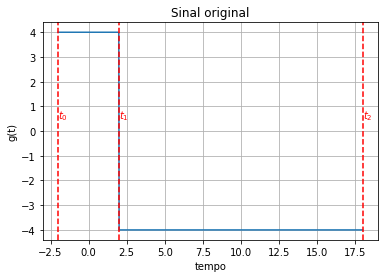

In [231]:
t = np.linspace(t0,t2,1000)
y = np.zeros(len(t))

for i in range(len(t)):
    if t[i] < t1 and t[i] >= t0:
        y[i] = Ap
    else:
        y[i] = An

plt.plot(t,y)
plt.grid()
plt.ylabel('g(t)')
plt.xlabel('tempo')
plt.title('Sinal original')


plt.axvline(x=t1, color='r', linestyle='--')
plt.text(t1, 0.5, r'$t_1$', color='r')
plt.axvline(x=t0, color='r', linestyle='--')
plt.text(t0, 0.5, r'$t_0$', color='r')
plt.axvline(x=t2, color='r', linestyle='--')
plt.text(t2, 0.5, r'$t_2$', color='r')


## Definindo variáveis simbólicas

In [232]:
n, wo, t = smp.symbols('n wo t')


### Definindo a análise de Fourier
$$C_n =  \dfrac{\int_{T0}{g(t)x_n(t)dt}}{\int_{To}x^2_n(t) dt} $$

In [233]:
xa = smp.cos(n*wo*t)
xb = smp.sin(n*wo*t)

an_num = smp.integrate(Ap*xa, (t, t0, t1)) + smp.integrate(An*xa, (t, t1, t2))
an_den = smp.integrate(xa**2, (t, t0, t2))

an = an_num/an_den

bn_num = smp.integrate(Ap*xb, (t, t0, t1)) + smp.integrate(An*xb, (t, t1, t2))
bn_den = smp.integrate(xb**2, (t, t0, t2))

bn = bn_num/bn_den

In [234]:
an

(Piecewise((8*sin(2.0*n*wo)/(n*wo), Ne(n*wo, 0)), (16.0, True)) + Piecewise((4*sin(2.0*n*wo)/(n*wo) - 4*sin(18.0*n*wo)/(n*wo), Ne(n*wo, 0)), (-64.0, True)))*Piecewise((1/(-(-1.0*n*wo - sin(2.0*n*wo)*cos(2.0*n*wo)/2)/(n*wo) + (9.0*n*wo + sin(18.0*n*wo)*cos(18.0*n*wo)/2)/(n*wo)), Ne(n*wo, 0)), (0.05, True))

In [235]:
bn


Piecewise((1/(-(-1.0*n*wo + sin(2.0*n*wo)*cos(2.0*n*wo)/2)/(n*wo) + (9.0*n*wo - sin(18.0*n*wo)*cos(18.0*n*wo)/2)/(n*wo)), Ne(n*wo, 0)), (zoo, True))*Piecewise((-4*cos(2.0*n*wo)/(n*wo) + 4*cos(18.0*n*wo)/(n*wo), Ne(n*wo, 0)), (0, True))

## Substituindo valores numéricos

In [236]:
n_array = np.arange(1,21, 1)

an_array = np.ones(n_array.shape)
bn_array = np.ones(n_array.shape)

for i in range(len(n_array)):
    an_array[i] = an.subs([(n, n_array[i]), (wo, w)])
    bn_array[i] = bn.subs([(n, n_array[i]), (wo, w)])


## Plotando os coeficientes

<StemContainer object of 3 artists>

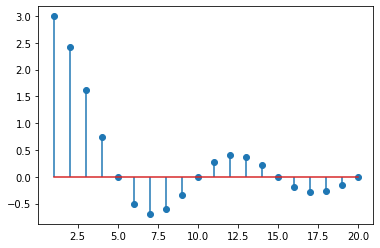

In [237]:
plt.stem(n_array, an_array)

<StemContainer object of 3 artists>

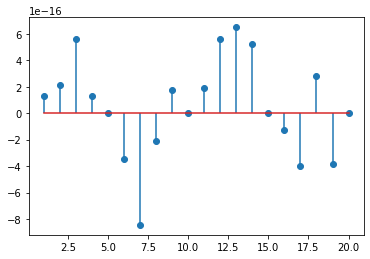

In [238]:
plt.stem(n_array, bn_array)


## Síntese de Fourier

$$g(t) = \sum_{n=0}^NC_nX_n(t)$$

In [239]:
gs = 0

for i in range(len(n_array)):
    gs += an_array[i]*xa.subs([(n, n_array[i]), (wo, w)]) + bn_array[i]*xb.subs([(n, n_array[i]), (wo, w)])

In [240]:
gs = smp.lambdify(t, gs)


Text(0.5, 1.0, 'Sinal sintetizado')

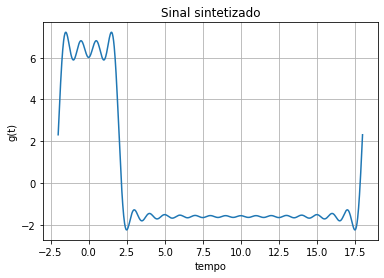

In [241]:
t = np.linspace(t0,t2,1000)

plt.plot(t, gs(t))
plt.grid()
plt.ylabel('g(t)')
plt.xlabel('tempo')
plt.title('Sinal sintetizado')


## Plotando ambos os sinais
Sem ajuste

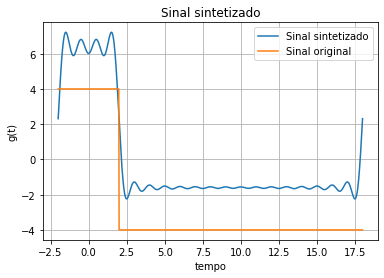

In [242]:

plt.plot(t, gs(t))

plt.plot(t,y)
plt.grid()
plt.ylabel('g(t)')

plt.xlabel('tempo')
plt.title('Sinal sintetizado')

plt.legend(['Sinal sintetizado', 'Sinal original'])


## Plotando ambos os sinais
Com ajuste

In [243]:
a0 = an.subs([(n, 0), (wo, w), (t, 0)])
a0

-2.40000000000000

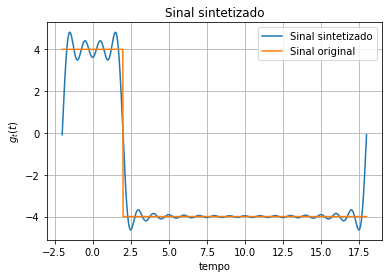

In [245]:

plt.plot(t, gs(t) + a0)

plt.plot(t,y)
plt.grid()
plt.ylabel('$g_t(t)$')

plt.xlabel('tempo')
plt.title('Sinal sintetizado')

plt.legend(['Sinal sintetizado', 'Sinal original'])
